In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_in=pd.read_csv("INvideos.csv")
df_fr=pd.read_csv("FRvideos.csv")
df_us=pd.read_csv("USvideos.csv")
df_ny=pd.read_csv("Newyork.csv")

In [6]:
df_ny.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#### Firstly, I will evaluate the NewYork Airbnd data which is receieved through link 1

In [7]:
df_ny.shape

(48895, 16)

In [8]:
df_ny.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [15]:
df_ny.drop_duplicates(inplace=True)

### Missing Value Handling

In [29]:
# Text columns fill with "Not Available"
text_cols=['name','host_name']
for col in text_cols:
    df_ny[col]=df_ny[col].fillna("Not Available")

# Numeric columns fill with 0
numeric_cols=['last_review','reviews_per_month']
for col in numeric_cols:
    df_ny[col]=df_ny[col].fillna(0)

In [30]:
df_ny.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### Standardize Data Formats 

In [31]:
df_ny['last_review']=pd.to_datetime(df_ny['last_review'],errors='coerce')

### Handling Outliers using IQR

In [134]:
def remove_outliers(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    df_clean = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
    return df_clean


df_ny.shape
numeric_cols = ["price", "minimum_nights"]

df_clean =remove_outliers(df_ny, numeric_cols)



In [135]:
def compare_ouliers_before_after(df_before,df_after,columns):
    for col in columns:
        plt.figure(figsize(12,5))
        plt.subplot(1,2,1)
        sns.boxplot(x=df_before[col])
        plt.title(f"Before Outlier Removal :{col}")

        plt.subplot(1,2,2)
        sns.boxplot(y=df_after[col])
        plt.title(f"After Outlier Removal : {col}")

        plt.tight_layout()
        plt.show()

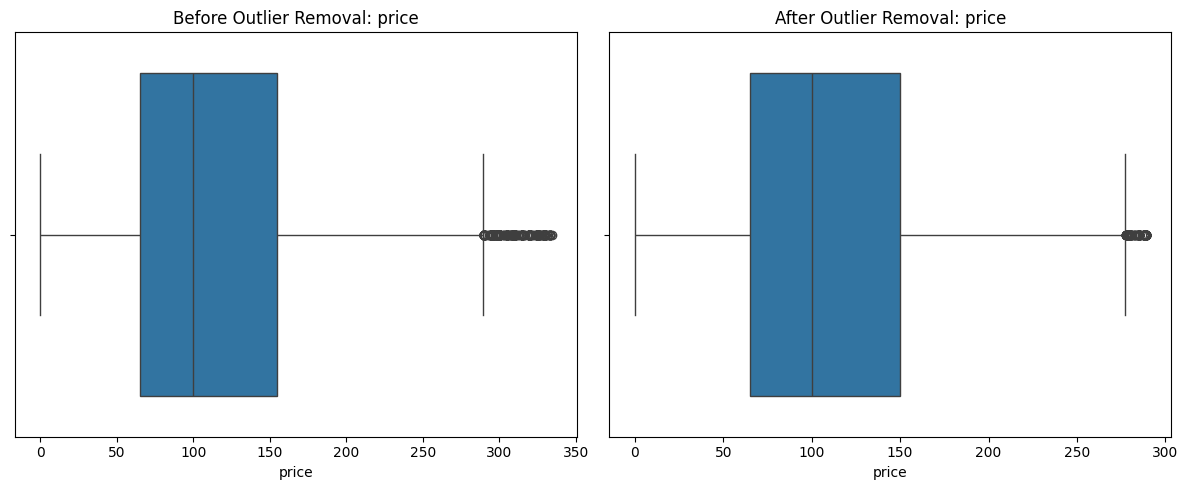

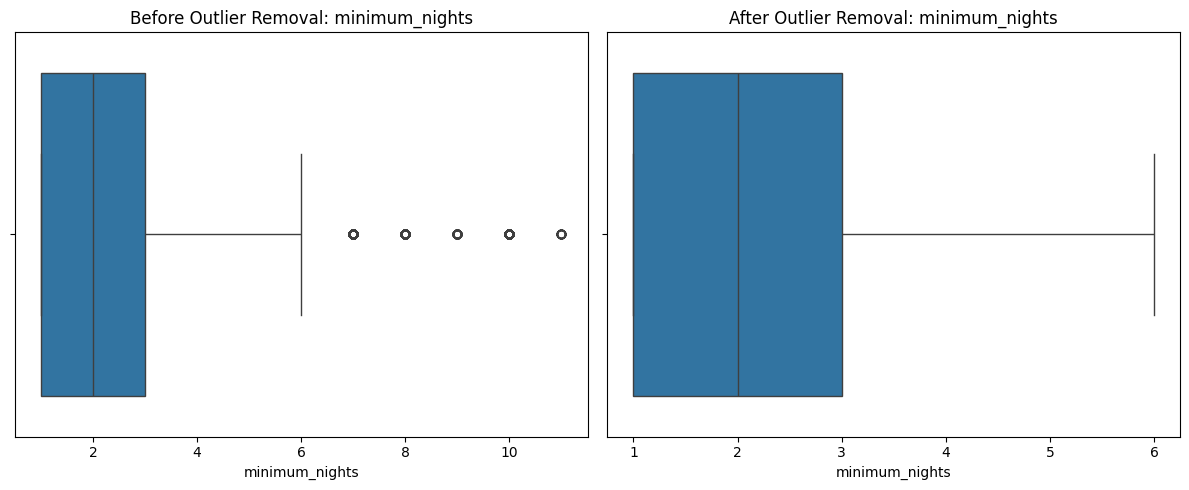

In [136]:
compare_outliers_before_after(df_ny, df_clean, numeric_cols)

### Clean text columns

In [46]:
df_ny.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & Quiet Apt Home By The Park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private Room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire Home/Apt,225,1,45,2019-05-21,0.38,2,355
2,3647,The Village Of Harlem....New York !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private Room,150,3,0,1970-01-01,0.00,1,365
3,3831,Cozy Entire Floor Of Brownstone,4869,Lisaroxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire Home/Apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft By Central Park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire Home/Apt,80,10,9,2018-11-19,0.10,1,0


In [45]:
df_ny["name"] = df_ny["name"].str.title()
df_ny["host_name"] = df_ny["host_name"].str.title()
df_ny["room_type"] = df_ny["room_type"].str.title()
df_ny["neighbourhood_group"] = df_ny["neighbourhood_group"].str.title()
df_ny["neighbourhood"] = df_ny["neighbourhood"].str.title()

### Now, I will evaluate the YouTube data of different countries which is receieved through link 2

In [50]:
df_in.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


In [51]:
df_fr.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...
1,Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...
2,ceqntSXE-10,17.14.11,DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...,Daniil le Russe,23,2017-11-13T17:00:38.000Z,"cartoon""|""pokémon""|""école""|""ours""|""мультфильм",482153,76203,477,9580,https://i.ytimg.com/vi/ceqntSXE-10/default.jpg,False,False,False,Une nouvelle dose de dessins animés français e...
3,WuTFI5qftCE,17.14.11,PAPY GRENIER - METAL GEAR SOLID,Joueur Du Grenier,20,2017-11-12T17:00:02.000Z,"Papy grenier""|""Metal Gear Solid""|""PS1""|""Tirage...",925222,85016,550,4303,https://i.ytimg.com/vi/WuTFI5qftCE/default.jpg,False,False,False,"Nouvel ,épisode de Papy Grenier ! Ce mois-ci o..."
4,ee6OFs8TdEg,17.14.11,QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...,Aurelien Fontenoy,17,2017-11-13T16:30:03.000Z,"vélo""|""vtt""|""bmx""|""freestyle""|""bike""|""mtb""|""di...",141695,8091,72,481,https://i.ytimg.com/vi/ee6OFs8TdEg/default.jpg,False,False,False,Sauts à plus de 4 mètres de haut dans un tramp...


In [52]:
df_us.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [53]:
df_in.shape

(37352, 16)

In [54]:
df_us.shape

(40949, 16)

In [55]:
df_fr.shape

(40724, 16)

#### Adding 'country' column

In [56]:
df_in["country"]="IN"
df_fr["country"]="FR"
df_us["country"]="US"

#### Merging all the datasets

In [58]:
df_all=pd.concat([df_in,df_fr,df_us],ignore_index=True)

In [99]:
df_all.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_date,trend_date
0,kzwfHumJyYc,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,IN,2017-11-12 00:00:00+00:00,NaT
1,zUZ1z7FwLc8,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",IN,2017-11-13 00:00:00+00:00,NaT
2,10L1hZ9qa58,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,IN,2017-11-12 00:00:00+00:00,NaT
3,N1vE8iiEg64,Eruma Saani | Tamil vs English,Eruma Saani,23,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,IN,2017-11-12 00:00:00+00:00,NaT
4,kJzGH0PVQHQ,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,IN,2017-11-13 00:00:00+00:00,NaT


In [96]:
df_all.tail()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_date,trend_date
119020,BZt0qjTWNhw,The Cat Who Caught the Laser,AaronsAnimals,15,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,US,2018-05-18 00:00:00+00:00,NaT
119021,1h7KV2sjUWY,True Facts : Ant Mutualism,zefrank1,22,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,US,2018-05-18 00:00:00+00:00,NaT
119022,D6Oy4LfoqsU,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,US,2018-05-18 00:00:00+00:00,NaT
119023,oV0zkMe1K8s,How Black Panther Should Have Ended,How It Should Have Ended,1,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,US,2018-05-17 00:00:00+00:00,NaT
119024,ooyjaVdt-jA,Official Call of Duty®: Black Ops 4 — Multipla...,Call of Duty,20,"call of duty|""cod""|""activision""|""Black Ops 4""",10306119,357079,212976,144795,https://i.ytimg.com/vi/ooyjaVdt-jA/default.jpg,False,False,False,Call of Duty: Black Ops 4 Multiplayer raises t...,US,2018-05-17 00:00:00+00:00,NaT


In [97]:
df_all.isnull().sum()

video_id                      0
title                         0
channel_title                 0
category_id                   0
tags                          0
views                         0
likes                         0
dislikes                      0
comment_count                 0
thumbnail_link                0
comments_disabled             0
ratings_disabled              0
video_error_or_removed        0
description                4008
country                       0
publish_date                  0
trend_date                71856
dtype: int64

In [100]:
# Remove duplicates

df_all.dropna(inplace=True)

#### Date column fix

In [109]:
df_all['publish_date']=pd.to_datetime(df_all['publish_date'],errors='coerce')

df_all['trend_date']=pd.to_datetime(df_all['trend_date'],format='%y.%m.%d',errors='coerce')


In [110]:
df_all.dtypes

video_id                          object
title                             object
channel_title                     object
category_id                        int64
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
description                       object
country                           object
publish_date              datetime64[ns]
trend_date                datetime64[ns]
dtype: object

In [111]:
df_all["publish_date"] = df_all["publish_date"].dt.normalize()
df_all["trend_date"] = df_all["trend_date"].dt.normalize()

In [112]:
df_all.dropna()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_date,trend_date
3256,6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",56367282,2157733,34077,303178,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...,IN,2017-11-29,2012-01-17
3257,hYM_iZII4U4,Thaanaa Serndha Koottam Official Tamil Teaser ...,Sony Music India,10,"Thaanaa Serndha Koottam - Naana Thaana Lyric|""...",3679229,294624,58475,18872,https://i.ytimg.com/vi/hYM_iZII4U4/default.jpg,False,False,False,"'Veratti veratti velukka thonuthu,\nAthigaara ...",IN,2017-11-30,2012-01-17
3259,Ta3Yruzx_lA,Oru Nalla Naal Paathu Solren Teaser | Vijay Se...,Think Music India,1,"Oru Nalla Naal Paathu Solren Teaser|""Oru Nalla...",1595682,67254,1342,1886,https://i.ytimg.com/vi/Ta3Yruzx_lA/default.jpg,False,False,False,#OruNallaNaalPaathuSolrenTeaser | #OruNallaNaa...,IN,2017-11-29,2012-01-17
3260,Ut-JRKyMjEI,Audition Gone Wrong Ft. Ashish Chanchlani | Mo...,MostlySane,23,"prajakta koli|""mostly sane""|""mostlysane""|""late...",486946,25582,1187,1623,https://i.ytimg.com/vi/Ut-JRKyMjEI/default.jpg,False,False,False,"Hey dumdums this was such a fun collaboration,...",IN,2017-11-30,2012-01-17
3261,J-tjx9KAZ20,రాత్రి హోటల్లో బాహుబలి 2 చూసిన ఇవాంకా ప్రభాస్ ...,Tollywood Nagar,24,"Ivanka Trump Watching Prabhas Baahubali 2|""Pra...",1137944,5331,1302,0,https://i.ytimg.com/vi/J-tjx9KAZ20/default.jpg,True,False,False,Tollywood Nagar...రాత్రి హోటల్లో బాహుబలి 2 చూస...,IN,2017-11-29,2012-01-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118620,H7gh2fmdjCU,Calum Scott - What I Miss Most (Official Video),CalumScottVEVO,10,"Calum|""Scott""|""What""|""Miss""|""Most""|""Capitol""|""...",9652709,150873,1831,4696,https://i.ytimg.com/vi/H7gh2fmdjCU/default.jpg,False,False,False,Calum’s debut album ‘Only Human’ feat. “You Ar...,US,2018-05-16,2006-12-18
118621,TjXQzRWmb_I,Destination Wedding Trailer #1 (2018) | Moviec...,Movieclips Trailers,1,"Destination Wedding|""Destination Wedding Trail...",5051093,57904,1822,6522,https://i.ytimg.com/vi/TjXQzRWmb_I/default.jpg,False,False,False,Check out the official Destination Wedding tra...,US,2018-05-16,2006-12-18
118622,-kTWIm7m4Uw,We Bought A House,JennaMarbles,23,"jenna|""marbles""|""mourey""|""we""|""bought""|""a hous...",3430539,337332,1842,49180,https://i.ytimg.com/vi/-kTWIm7m4Uw/default.jpg,False,False,False,This house means the world to us. The absolut...,US,2018-05-16,2006-12-18
118623,Q5KmA3Xbmqo,The Spider and The Butterfly - Animated Short,Dragonfoxgirl,24,"animation|""thesis film""|""dragonfoxgirl""|""anima...",7782373,350735,5822,46418,https://i.ytimg.com/vi/Q5KmA3Xbmqo/default.jpg,False,False,False,A little white spider spends her days daydream...,US,2018-05-15,2006-12-18


In [113]:
df_all['trend_date']

3256     2012-01-17
3257     2012-01-17
3259     2012-01-17
3260     2012-01-17
3261     2012-01-17
            ...    
118620   2006-12-18
118621   2006-12-18
118622   2006-12-18
118623   2006-12-18
118624   2006-12-18
Name: trend_date, Length: 41365, dtype: datetime64[ns]

In [114]:
df_all.isnull().sum()

video_id                  0
title                     0
channel_title             0
category_id               0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
country                   0
publish_date              0
trend_date                0
dtype: int64

### Outliers Removal

In [119]:
def outlier_remove(df,columns):
    for col in columns:
        q1=df[col].quantile(0.25)
        q3=df[col].quantile(0.75)
        iqr=q3-q1
        lower_bound=q1-1.5*iqr
        upper_bound=q3+1.5*iqr
        df=df[(df[col]>=lower_bound)&(df[col]<=upper_bound)]
        return df
numeric_cols = ["views", "likes", "dislikes", "comment_count"]

df_clean =outlier_remove(df_all, numeric_cols)

In [120]:
print("Before:", df_all.shape)
print("After:", df_clean.shape)

Before: (41365, 17)
After: (36527, 17)


In [121]:
def compare_outliers_before_after(df_before, df_after, columns):
    for col in columns:
        plt.figure(figsize=(12,5))

        plt.subplot(1,2,1)
        sns.boxplot(x=df_before[col])
        plt.title(f"Before Outlier Removal: {col}")

        plt.subplot(1,2,2)
        sns.boxplot(x=df_after[col])
        plt.title(f"After Outlier Removal: {col}")

        plt.tight_layout()
        plt.show()


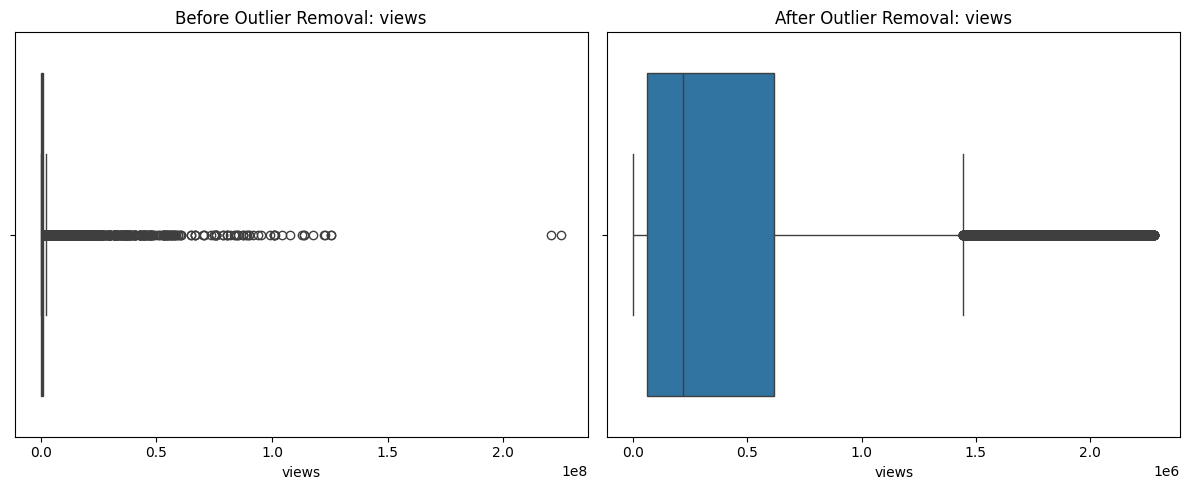

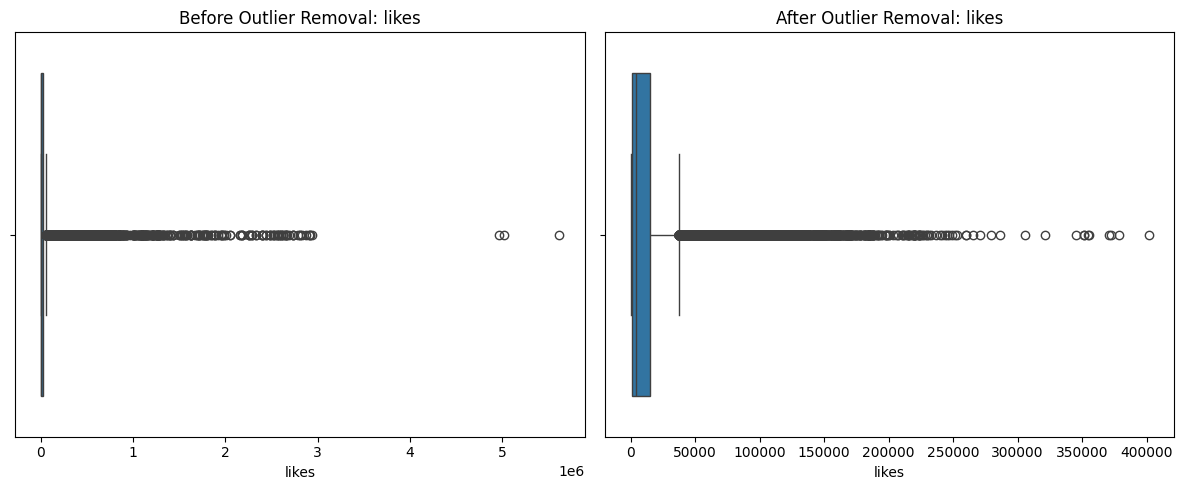

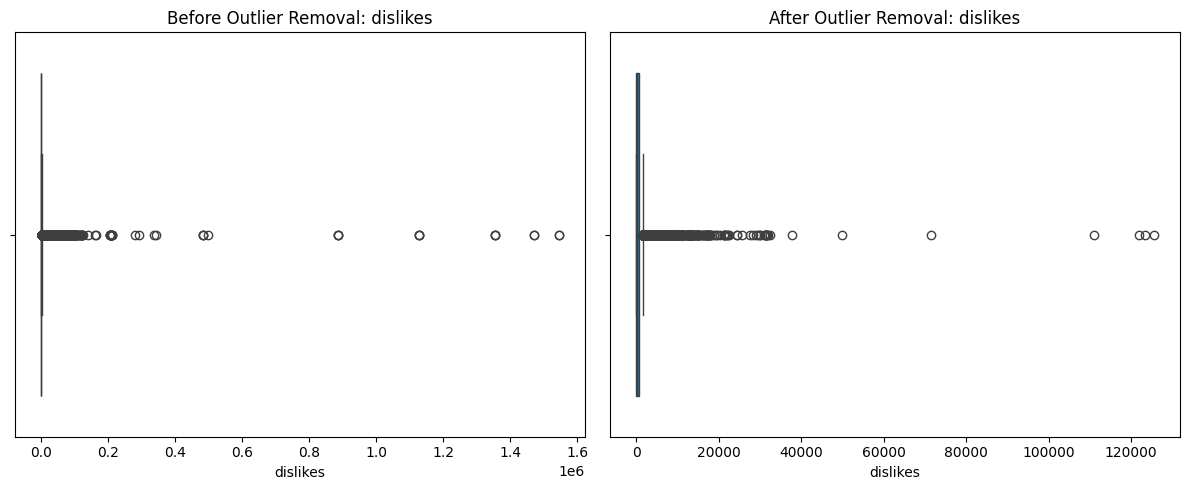

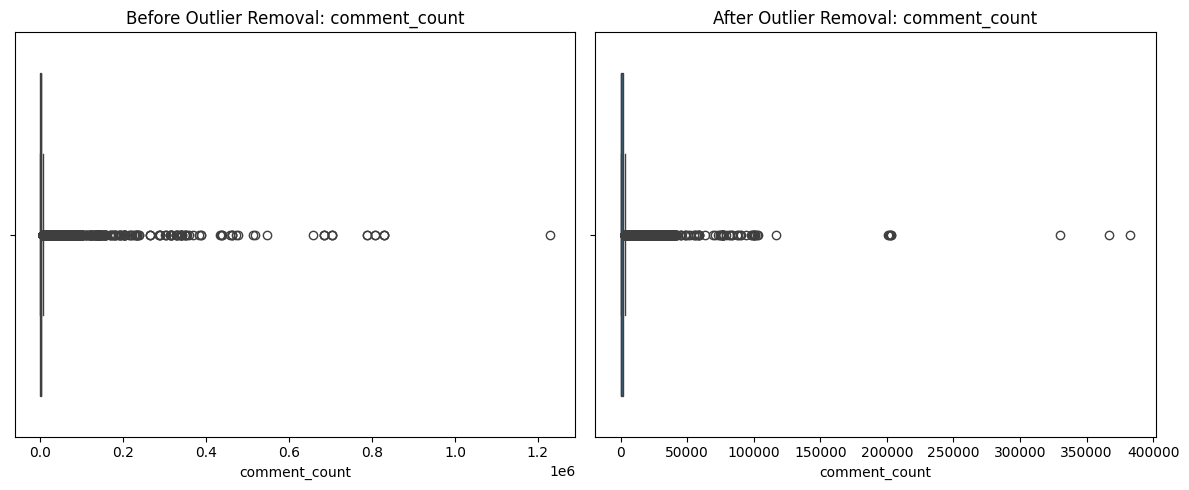

In [124]:
compare_outliers_before_after(df_all, df_clean, numeric_cols)